# SECOND VIDEO STARTS HERE
https://www.youtube.com/watch?v=TCH_1BHY58I

## Now let's try to predict more than one character

Next character in a sequence quickly blow up, the table size of counts table grows exponentially, if we only take a single character at a time, that's 27 posibilities, but if we take 2 characters and try to predict the next one, then 27 x 27, there's 729 posibilities, then if we take into context three chars, then suddenly we have 20000 posibilities, so there's way just too many rows of the matrix N, and doesn't work very well.

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words = open("names.txt", 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mappings to/from integers

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [7]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size

    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
# this is kind of like a rolling window of context


emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
# Let's cram the 27 possible characters into a two-dimensional space

C = torch.randn((27, 2), names=["characters", "embeddings_2D"])
C

/tmp/ipykernel_408443/871842550.py:3: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1900.)
  C = torch.randn((27, 2), names=["characters", "embeddings_2D"])


tensor([[-1.5386e+00,  1.8487e+00],
        [-6.7712e-01,  1.9750e+00],
        [ 6.4264e-01,  7.5298e-01],
        [ 4.1627e-01, -1.3786e+00],
        [-4.4313e-01,  7.5561e-01],
        [ 1.6538e+00, -1.6568e+00],
        [-2.1692e+00,  1.2204e+00],
        [ 4.9455e-02,  1.2173e-03],
        [ 7.0645e-01, -6.2030e-01],
        [ 1.7211e+00,  1.4553e+00],
        [-4.0264e-01,  7.8527e-01],
        [ 1.6993e+00,  1.3837e+00],
        [ 7.3711e-01,  4.8597e-01],
        [ 2.2373e-02, -1.1911e-01],
        [ 4.6678e-01,  1.4867e+00],
        [ 1.7984e-03,  1.6052e+00],
        [ 9.0456e-01,  6.3669e-01],
        [ 3.4110e-01, -1.7836e+00],
        [-1.0568e+00, -1.0574e-01],
        [-4.7952e-01, -1.0606e+00],
        [-1.5863e+00, -5.8871e-01],
        [-2.9061e-02,  1.1486e+00],
        [ 2.8026e-01, -1.0524e+00],
        [-1.2587e+00,  4.4348e-01],
        [-7.2958e-01, -1.6767e+00],
        [-3.1377e-01,  7.8485e-01],
        [ 2.8619e-01, -2.7903e-01]], names=('characters', 'embed

In [10]:
# let's encode number 5, plucking out the sixth entry
C[5]

tensor([ 1.6538, -1.6568], names=('embeddings_2D',))

In [11]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 1.6538, -1.6568], names=('embeddings_2D',))

In [12]:
C = C.rename(None)
C[[5, 6, 7]].rename(None)

tensor([[ 1.6538e+00, -1.6568e+00],
        [-2.1692e+00,  1.2204e+00],
        [ 4.9455e-02,  1.2173e-03]])

In [13]:
C[torch.tensor([5, 6, 7])]

tensor([[ 1.6538e+00, -1.6568e+00],
        [-2.1692e+00,  1.2204e+00],
        [ 4.9455e-02,  1.2173e-03]])

In [14]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[ 1.6538e+00, -1.6568e+00],
        [-2.1692e+00,  1.2204e+00],
        [ 4.9455e-02,  1.2173e-03],
        [ 4.9455e-02,  1.2173e-03],
        [ 4.9455e-02,  1.2173e-03],
        [ 4.9455e-02,  1.2173e-03]])

In [15]:
# torch indexing is awesome
C[X].shape

torch.Size([32, 3, 2])

In [16]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [17]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [18]:
C[X][13, 2]

tensor([-0.6771,  1.9750])

In [19]:
C[1]

tensor([-0.6771,  1.9750])

In [20]:
C

tensor([[-1.5386e+00,  1.8487e+00],
        [-6.7712e-01,  1.9750e+00],
        [ 6.4264e-01,  7.5298e-01],
        [ 4.1627e-01, -1.3786e+00],
        [-4.4313e-01,  7.5561e-01],
        [ 1.6538e+00, -1.6568e+00],
        [-2.1692e+00,  1.2204e+00],
        [ 4.9455e-02,  1.2173e-03],
        [ 7.0645e-01, -6.2030e-01],
        [ 1.7211e+00,  1.4553e+00],
        [-4.0264e-01,  7.8527e-01],
        [ 1.6993e+00,  1.3837e+00],
        [ 7.3711e-01,  4.8597e-01],
        [ 2.2373e-02, -1.1911e-01],
        [ 4.6678e-01,  1.4867e+00],
        [ 1.7984e-03,  1.6052e+00],
        [ 9.0456e-01,  6.3669e-01],
        [ 3.4110e-01, -1.7836e+00],
        [-1.0568e+00, -1.0574e-01],
        [-4.7952e-01, -1.0606e+00],
        [-1.5863e+00, -5.8871e-01],
        [-2.9061e-02,  1.1486e+00],
        [ 2.8026e-01, -1.0524e+00],
        [-1.2587e+00,  4.4348e-01],
        [-7.2958e-01, -1.6767e+00],
        [-3.1377e-01,  7.8485e-01],
        [ 2.8619e-01, -2.7903e-01]])

In [21]:
# lookup table C
embeddings = C[X]
embeddings.shape

torch.Size([32, 3, 2])

In [22]:
embeddings

tensor([[[-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00]],

        [[-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [ 1.6538e+00, -1.6568e+00]],

        [[-1.5386e+00,  1.8487e+00],
         [ 1.6538e+00, -1.6568e+00],
         [ 2.2373e-02, -1.1911e-01]],

        [[ 1.6538e+00, -1.6568e+00],
         [ 2.2373e-02, -1.1911e-01],
         [ 2.2373e-02, -1.1911e-01]],

        [[ 2.2373e-02, -1.1911e-01],
         [ 2.2373e-02, -1.1911e-01],
         [-6.7712e-01,  1.9750e+00]],

        [[-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00]],

        [[-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [ 1.7984e-03,  1.6052e+00]],

        [[-1.5386e+00,  1.8487e+00],
         [ 1.7984e-03,  1.6052e+00],
         [ 7.3711e-01,  4.8597e-01]],

        [[ 1.7984e-03,  1.6052e+00],
         [ 7.3711e-01,  4.8597e-01],
         [ 1.7211e+00,

In [23]:
embeddings.stride()

(6, 2, 1)

In [24]:
# implementing the hidden layer

W1 = torch.randn((6, 100)) # the number of inputs to this layer will be 3 x 2 = 6, because we have two dimensional embeddings and we have three of them; let's do 100 neurons
b1 = torch.randn(100)

In [25]:
# we can't do embeddings @ W1 + b1 because the embeddings are stacked up and tensor dimensions aren't fit with each other
# there are usually many ways to implement this, some are faster, some are shorter etc. torch is large

embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]

(tensor([[-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [ 1.6538e+00, -1.6568e+00],
         [ 2.2373e-02, -1.1911e-01],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [ 1.7984e-03,  1.6052e+00],
         [ 7.3711e-01,  4.8597e-01],
         [ 1.7211e+00,  1.4553e+00],
         [ 2.8026e-01, -1.0524e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-6.7712e-01,  1.9750e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
         [ 1.7211e+00,  1.4553e+00],
         [-4.7952e-01, -1.0606e+00],
         [-6.7712e-01,  1.9750e+00],
         [ 6.4264e-01,  7.5298e-01],
         [ 1.6538e+00, -1.6568e+00],
         [ 7.3711e-01,  4.8597e-01],
         [-1.5386e+00,  1.8487e+00],
         [-1.5386e+00,  1.8487e+00],
 

In [26]:
torch.cat([embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]], 1).shape

torch.Size([32, 6])

In [27]:
torch.cat(torch.unbind(embeddings, 1), 1).shape

torch.Size([32, 6])

In [28]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [29]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [30]:
# .view is extremely efficient
b = a.view(3, 3, 2)

In [31]:
b.storage()

/tmp/ipykernel_408443/3076968323.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  b.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [32]:
embeddings.view(32, 6)

tensor([[-1.5386e+00,  1.8487e+00, -1.5386e+00,  1.8487e+00, -1.5386e+00,
          1.8487e+00],
        [-1.5386e+00,  1.8487e+00, -1.5386e+00,  1.8487e+00,  1.6538e+00,
         -1.6568e+00],
        [-1.5386e+00,  1.8487e+00,  1.6538e+00, -1.6568e+00,  2.2373e-02,
         -1.1911e-01],
        [ 1.6538e+00, -1.6568e+00,  2.2373e-02, -1.1911e-01,  2.2373e-02,
         -1.1911e-01],
        [ 2.2373e-02, -1.1911e-01,  2.2373e-02, -1.1911e-01, -6.7712e-01,
          1.9750e+00],
        [-1.5386e+00,  1.8487e+00, -1.5386e+00,  1.8487e+00, -1.5386e+00,
          1.8487e+00],
        [-1.5386e+00,  1.8487e+00, -1.5386e+00,  1.8487e+00,  1.7984e-03,
          1.6052e+00],
        [-1.5386e+00,  1.8487e+00,  1.7984e-03,  1.6052e+00,  7.3711e-01,
          4.8597e-01],
        [ 1.7984e-03,  1.6052e+00,  7.3711e-01,  4.8597e-01,  1.7211e+00,
          1.4553e+00],
        [ 7.3711e-01,  4.8597e-01,  1.7211e+00,  1.4553e+00,  2.8026e-01,
         -1.0524e+00],
        [ 1.7211e+00,  1.4553e

In [33]:
embeddings.view(32, 6).shape == torch.cat(torch.unbind(embeddings, 1), 1).shape == torch.cat([embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]], 1).shape

True

In [34]:
# using -1, so we won't hardcode numbers, when we do -1, torch will infer what this should be
h = embeddings.view(-1, 6)
h.shape

torch.Size([32, 6])

In [35]:
W1 = torch.randn((6, 100)) # the number of inputs to this layer will be 3 x 2 = 6, because we have two dimensional embeddings and we have three of them; let's do 100 neurons
b1 = torch.randn(100)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # bias will be added to all elements in the rows
print(h.shape)
print(b1.shape)
h

torch.Size([32, 100])
torch.Size([100])


tensor([[-0.8156, -0.5897,  0.9998,  ..., -0.4826,  0.8758, -0.9777],
        [-0.9547, -0.7934, -0.9582,  ..., -0.9687, -0.9975,  0.9994],
        [-0.9855,  0.2595,  0.1929,  ...,  0.9708,  0.8989,  0.9980],
        ...,
        [-0.9946, -0.0194, -0.4549,  ..., -0.6456, -0.9958, -0.1482],
        [-0.9993, -0.9951, -0.9984,  ..., -0.7173, -0.9204, -1.0000],
        [ 0.8983,  0.9852,  0.9880,  ..., -0.9917,  0.7021, -1.0000]])

In [36]:
# let's create the final layer

W2 = torch.randn((100, 27)) # the input now will be 100 because the hidden layer has 100 outputs, the output number of these neurons will be 27 because we have 27 possible characters
b2 = torch.randn(27) # biases will be 27 as well

logits = h @ W2 + b2
logits[:3]

tensor([[  4.8352,  -0.8113,  -5.2077,  -1.6692,  -8.6118,  -4.3560,  -4.4816,
          -2.5404, -10.3583,  -9.4154,   3.7328, -13.4735,  -9.5245,   4.2486,
          12.7284,   3.8295,  -8.1381,  12.6194,   6.0599,  -7.1012, -13.1742,
           3.2031,   6.8065,   9.9618,  -0.3751,  -3.4676,   7.2946],
        [ -4.3128,   7.1014,   4.7680,   2.1870, -18.6293,   4.9823,   5.0163,
          -9.5518,   3.0199,   7.8746,   6.1167,   4.2357, -10.2116,  10.9785,
          -6.8028, -19.0346,  -5.0495,  -0.9637,   3.0904, -11.2131,  -0.3035,
          -9.0335,  -1.9587,   5.8284, -14.2298,  -2.4411,  -2.5042],
        [ -1.6455,  -6.7552,   9.2235,  -7.3221,  -6.0991,  -1.8336,   7.8402,
           5.8387,  -3.9031,  -5.6698,   2.5161,  -6.4892,  27.3049,   5.4840,
          -1.3790,  -6.2014,   6.2420,   4.1894, -12.8097, -11.8332,   1.9206,
           5.8368,  -9.8765,   2.3276,  11.4135,   5.3316,   3.8546]])

In [37]:
logits.shape

torch.Size([32, 27])

In [38]:
counts = logits.exp()
counts[:3]

tensor([[1.2587e+02, 4.4426e-01, 5.4744e-03, 1.8839e-01, 1.8194e-04, 1.2829e-02,
         1.1315e-02, 7.8836e-02, 3.1729e-05, 8.1457e-05, 4.1796e+01, 1.4077e-06,
         7.3041e-05, 7.0004e+01, 3.3720e+05, 4.6040e+01, 2.9218e-04, 3.0237e+05,
         4.2831e+02, 8.2409e-04, 1.8991e-06, 2.4608e+01, 9.0373e+02, 2.1200e+04,
         6.8721e-01, 3.1192e-02, 1.4724e+03],
        [1.3396e-02, 1.2137e+03, 1.1769e+02, 8.9081e+00, 8.1173e-09, 1.4581e+02,
         1.5084e+02, 7.1071e-05, 2.0489e+01, 2.6296e+03, 4.5338e+02, 6.9110e+01,
         3.6743e-05, 5.8602e+04, 1.1106e-03, 5.4122e-09, 6.4127e-03, 3.8150e-01,
         2.1985e+01, 1.3496e-05, 7.3824e-01, 1.1934e-04, 1.4105e-01, 3.3980e+02,
         6.6083e-07, 8.7068e-02, 8.1743e-02],
        [1.9292e-01, 1.1648e-03, 1.0133e+04, 6.6079e-04, 2.2448e-03, 1.5984e-01,
         2.5406e+03, 3.4333e+02, 2.0178e-02, 3.4485e-03, 1.2380e+01, 1.5198e-03,
         7.2174e+11, 2.4080e+02, 2.5184e-01, 2.0265e-03, 5.1387e+02, 6.5983e+01,
         2.7340e-

In [39]:
prob = counts / counts.sum(1, keepdim=True)
prob[:3]

tensor([[1.8959e-04, 6.6919e-07, 8.2461e-09, 2.8377e-07, 2.7406e-10, 1.9324e-08,
         1.7044e-08, 1.1875e-07, 4.7793e-11, 1.2270e-10, 6.2957e-05, 2.1205e-12,
         1.1002e-10, 1.0545e-04, 5.0792e-01, 6.9350e-05, 4.4012e-10, 4.5545e-01,
         6.4516e-04, 1.2413e-09, 2.8605e-12, 3.7067e-05, 1.3613e-03, 3.1934e-02,
         1.0351e-06, 4.6985e-08, 2.2178e-03],
        [2.1005e-07, 1.9031e-02, 1.8454e-03, 1.3968e-04, 1.2728e-13, 2.2864e-03,
         2.3653e-03, 1.1144e-09, 3.2128e-04, 4.1233e-02, 7.1090e-03, 1.0837e-03,
         5.7614e-10, 9.1889e-01, 1.7415e-08, 8.4865e-14, 1.0055e-07, 5.9819e-06,
         3.4473e-04, 2.1163e-10, 1.1576e-05, 1.8713e-09, 2.2116e-06, 5.3281e-03,
         1.0362e-11, 1.3652e-06, 1.2817e-06],
        [2.6730e-13, 1.6139e-15, 1.4040e-08, 9.1556e-16, 3.1102e-15, 2.2147e-13,
         3.5202e-09, 4.7570e-10, 2.7958e-14, 4.7781e-15, 1.7153e-11, 2.1058e-15,
         1.0000e+00, 3.3364e-10, 3.4894e-13, 2.8078e-15, 7.1200e-10, 9.1422e-11,
         3.7881e-

In [40]:
prob[0].sum()

tensor(1.0000)

In [41]:
# index into the rows of prob and in each row pluck out the probability assigned to the correct character
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [42]:
prob[torch.arange(32), Y]

tensor([1.9324e-08, 9.1889e-01, 3.3364e-10, 4.4633e-01, 5.1886e-05, 6.9350e-05,
        8.6384e-10, 9.2564e-02, 7.1187e-09, 9.1351e-05, 1.6712e-09, 8.4133e-08,
        6.6919e-07, 4.0736e-04, 1.8228e-07, 1.5693e-07, 1.2270e-10, 2.0883e-09,
        1.5495e-14, 2.9964e-08, 2.6122e-10, 8.7837e-08, 6.1697e-01, 3.2713e-01,
        6.6076e-06, 1.2413e-09, 2.6503e-07, 5.8911e-08, 1.1901e-06, 2.1394e-05,
        2.4917e-10, 3.4066e-08])

In [43]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(14.3971)

### Rewrite

In machine learning, parameters and hyperparameters are fundamental concepts.

    Parameters: Parameters are the internal variables whose values are learned from the training data during the model fitting process. These parameters define the structure and behavior of the model. For example, in a simple linear regression model, parameters would be the coefficients and the intercept. In a neural network, parameters would include the weights and biases of the neurons in each layer.

    Hyperparameters: Hyperparameters are external configuration settings that are not learned from the data but are set prior to the training process. They control the learning process and the overall behavior of the model. Examples of hyperparameters include the learning rate, regularization strength, number of hidden layers in a neural network, and the choice of algorithm itself.

The key differences between parameters and hyperparameters are:

    Parameters are learned during the training process, while hyperparameters are set before the training process.
    Parameters are specific to the model and its structure, while hyperparameters are external factors that affect the learning process.

Tuning hyperparameters effectively is crucial for optimizing a model's performance. This process often involves experimentation, such as using techniques like grid search or random search to find the best combination of hyperparameters for a given task and dataset.

    C, W1, b1, W2, and b2 are tensors. These tensors represent the weights and biases of a neural network. They are learned during the training process and directly affect the behavior of the model based on the data. Therefore, they are parameters.

    Hyperparameters, on the other hand, are external settings that control the learning process itself, such as the learning rate, regularization strength, or the structure of the network (e.g., number of layers, number of neurons per layer). These hyperparameters are not learned from the data but are set by the user before the training process begins.

In [44]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [45]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

In [46]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [47]:
# forward pass
embeddings = C[X] # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # (32, 100) 
logits = h @ W2 + b2 # (32, 27)

# embeddings = C[X] performs the first step of the forward pass, where the input X is used to index into the tensor C to obtain the corresponding embeddings. This step transforms the input into a higher-dimensional representation based on the embedding matrix C.
# h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) represents the propagation of the transformed input through the first hidden layer of the neural network. It computes the activations of the neurons in the hidden layer using the hyperbolic tangent (tanh) activation function.
# logits = h @ W2 + b2 calculates the final logits by propagating the activations from the hidden layer through the output layer of the neural network.
# These three lines together constitute the forward pass of the neural network, where input data is processed through the layers of the network to generate predictions.

# softmax
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)

# loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [48]:
# let's make this even more respectable
# what we did in the cell above is classification and for this there's cross_entropy function in pytorch.
# we can simply call F.cross_entropy, pass in the logits and the array of targets Y, and this calculates the exact same loss

F.cross_entropy(logits, Y)

# when you use f.cross entropy by torch will not actually create all those intermediate tensors from the above cell, because these are all new tensors in memory and all this is fairly inefficient to run

tensor(17.7697)

In [49]:
# also cross_entropy is very well behaved
# bad behavior down here, when one logit is very positive, you get a nan

logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
print(counts)
probs

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])


tensor([0., 0., 0., nan])

In [50]:
# the way pytorch solved this is by offsetting the problematic number by itself.

logits = torch.tensor([-100, -3, 0, 100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

### implementing the training loop, overfitting one batch

In [51]:
for p in parameters:
    p.requires_grad = True

In [52]:
for _ in range(10):
    # forward pass
    embeddings = C[X] # (32, 3, 2)
    h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # (32, 100) 
    logits = h @ W2 + b2 # (32, 27)

    loss = F.cross_entropy(logits, Y)

    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad

17.76971435546875
13.656401634216309
11.298768997192383
9.452455520629883
7.984262466430664
6.891321182250977
6.100014686584473
5.452036380767822
4.898151874542236
4.414664268493652


In [53]:
# run for a thousand times we get a very very low loss and that means that we're making very good predictions
# now the reason that this is so straightforward right now is because we're only overfitting 32 examples,
# so we only have 32 examples of the first 5 words and therefore it's very easy to make this neural net fit only these two 32
# because we have 3400 parameters and only 32 examples so we're doing what's called overfitting a single batch of the data and getting a very low loss and good predictions, but that's just because we have so many parameters for so few examples so it's easy to make this be very low

for _ in range(1000):
    # forward pass
    embeddings = C[X] # (32, 3, 2)
    h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # (32, 100) 
    logits = h @ W2 + b2 # (32, 27)

    loss = F.cross_entropy(logits, Y)

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

0.25609633326530457


In [54]:
# Moving tensors to the GPU

g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)

# Define the parameters list
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

# Move tensors to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
C = C.to(device)
W1 = W1.to(device)
b1 = b1.to(device)
W2 = W2.to(device)
b2 = b2.to(device)
X = X.to(device)
Y = Y.to(device)

In [ ]:
# Training loop
for _ in range(1000):
    with torch.cuda.device(device):
        # Forward pass
        embeddings = C[X]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y)

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad

print(loss.item())

In [56]:
logits.max(1)

torch.return_types.max(
values=tensor([21.6638, 26.2643, 25.9028, 20.5271, 19.7233, 21.6638, 27.8875, 18.4312,
        17.8855, 12.3067, 16.3167, 14.7824, 21.6638, 20.7853, 14.9944, 17.8890,
        21.6638, 21.3690, 18.6206, 17.2354, 11.1006, 17.4859, 15.9277, 13.6605,
        15.6246, 21.6638, 21.0790, 14.4026, 14.7089, 23.1252, 15.9744, 24.1714],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([10, 10,  9, 14, 10, 10, 10, 26,  9, 21,  2, 14, 10, 10, 10, 22, 10, 10,
        10, 10, 14, 10, 26, 23, 20, 10, 10, 10, 23,  9, 14, 10],
       device='cuda:0'))

In [57]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0],
       device='cuda:0')

In [88]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words:
    #print(w)
    context = [0] * block_size

    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
# this is kind of like a rolling window of context

In [89]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [82]:
C = torch.randn((27, 2))

In [83]:
embeddings = C[X]
embeddings.shape

torch.Size([228146, 3, 2])

In [119]:
# Moving tensors to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g).to(device)
W1 = torch.randn((6, 100), generator=g).to(device)
b1 = torch.randn(100, generator=g).to(device)
W2 = torch.randn((100, 27), generator=g).to(device)
b2 = torch.randn((27), generator=g).to(device)



# Define the parameters list
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

# Move tensors to GPU

embeddings = C[X]
embeddings.to(device)

X = X.to(device)
Y = Y.to(device)

In [93]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [94]:
# Training loop
for _ in range(10):
    #with torch.cuda.device(device):
        # Forward pass
        embeddings = C[X]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y)
        print(loss.item())

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad


19.505231857299805
17.084461212158203
15.776474952697754
14.833340644836426
14.002630233764648
13.25328540802002
12.579960823059082
11.983065605163574
11.470518112182617
11.051850318908691


In [95]:
# we're doing way too much work forwarding and backwarding 220000 examples
# in practice what people usually do is they perform forward and backward pass and update on minibatches of the data
# will do a random select of some portion of the dataset, that's a minibatch, and then only forward backward and update on that little mini batch and then we iterate on those many batches

torch.randint(0, 5, (32,))

tensor([0, 1, 0, 4, 0, 4, 3, 3, 3, 1, 0, 2, 0, 4, 3, 4, 1, 2, 0, 3, 4, 1, 4, 4,
        1, 4, 3, 2, 1, 1, 0, 4])

In [96]:
torch.randint(0, X.shape[0], (32,))

tensor([ 75852,  88991,  43624, 173297, 150882,   1304, 120285, 160074, 187052,
         44761, 136333, 195909,  14064, 198427, 101306,  33372,  50381,  24462,
         67966, 205131, 225902,  48745, 136737, 117571, 155620,  63858, 143514,
        105419,  71514,  83515, 118944,  62652])

In [99]:
# Training loop

for _ in range(10):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        print(loss.item())

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad

# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

9.434331893920898
7.9368977546691895
10.220366477966309
8.563759803771973
8.058805465698242
9.294872283935547
5.962841510772705
6.449060440063477
8.711114883422852
6.3758015632629395


In [100]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(6.8494, device='cuda:0', grad_fn=<NllLossBackward0>)

In [103]:
# Training loop

for _ in range(100):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad
print(loss.item())
# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

2.948551893234253


In [104]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(3.0317, device='cuda:0', grad_fn=<NllLossBackward0>)

In [107]:
print(1e0)

1.0


In [108]:
learn_rate = torch.linspace(-3, 0, 1000)
learn_rate_exponent = 10**learn_rate
learn_rate_exponent

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [112]:
# continuing the optimization

# Training loop
lri = []
lossi = []

for i in range(1000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        learning_rate = learn_rate_exponent[i]
        for p in parameters:
            p.data += -learning_rate * p.grad

        # track stats
        lri.append(learning_rate)
        lossi.append(loss.item())
    
print(loss.item())
# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

11.470012664794922


In [113]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(8.3443, device='cuda:0', grad_fn=<NllLossBackward0>)

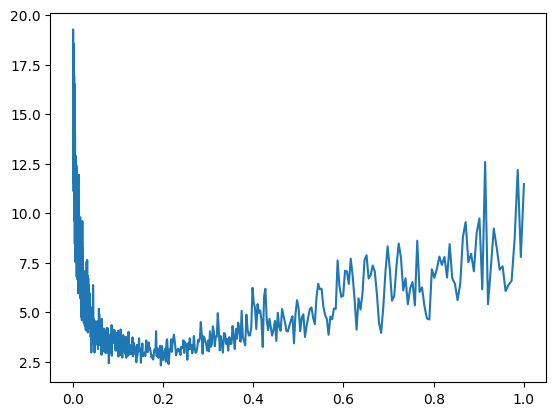

In [114]:
# plot where in the beginning you had very low learning rates so the nice spot is somewhere around 0.2 learning rate
plt.plot(lri, lossi)

In [120]:
# continuing the optimization
learn_rate = torch.linspace(-3, 0, 1000)
learn_rate_exponent = 10**learn_rate

# Training loop
lri = []
lossi = []

for i in range(1000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        learning_rate = learn_rate_exponent[i]
        for p in parameters:
            p.data += -learning_rate * p.grad

        # track stats
        lri.append(learn_rate[i]) # added i here
        lossi.append(loss.item())
    
print(loss.item())
# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

9.277878761291504


In [121]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(7.9324, device='cuda:0', grad_fn=<NllLossBackward0>)

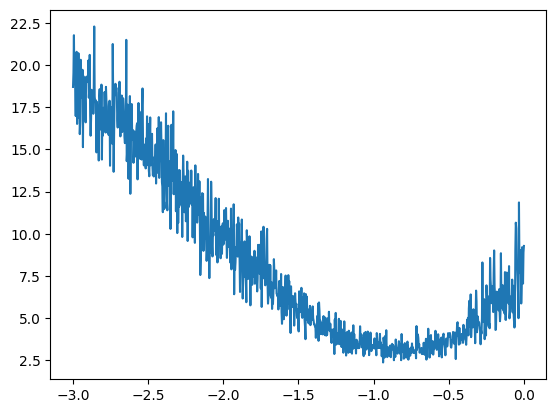

In [122]:
# now on the x axis we have the exponent of the learning rate and so we can see the exponent of the learning rate that is good to use. Lowest point in the valley, so 10**-1 is 0.1, and this is actually what we have used before and is a pretty good setting (hyperparameter)
plt.plot(lri, lossi)